### 1、数据预处理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

### 1.1 导入并查看数据

In [3]:
#导入数据

#设置异常捕获
try:
    data = pd.read_excel("E:/编程基础课程资料/期末报告/北京市空气质量数据.xlsx")
    print('文件读取正常！')
except FileNotFoundError:
    print('无法打开指定的文件!')

文件读取正常！


In [4]:
data

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3
0,2014-01-01,81,良,45,111,28,1.5,62,52
1,2014-01-02,145,轻度污染,111,168,69,3.4,93,14
2,2014-01-03,74,良,47,98,29,1.3,52,56
3,2014-01-04,149,轻度污染,114,147,40,2.8,75,14
4,2014-01-05,119,轻度污染,91,117,36,2.3,67,44
...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183,中度污染,138,181,9,2.4,94,5
2151,2019-11-23,175,中度污染,132,137,6,1.6,69,34
2152,2019-11-24,30,优,7,30,3,0.2,11,58
2153,2019-11-25,40,优,13,30,3,0.4,32,29


In [5]:
data.describe()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,106.438515,64.343852,90.251972,10.246404,1.038794,45.509977,98.263573
std,67.168252,59.652990,67.484625,13.679346,0.842801,22.598865,63.196868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,24.000000,44.000000,3.000000,0.600000,30.000000,52.000000
50%,89.000000,47.000000,75.000000,5.000000,0.800000,40.000000,83.000000
75%,138.000000,84.000000,117.000000,11.000000,1.200000,56.000000,141.000000
max,500.000000,477.000000,550.000000,133.000000,8.000000,155.000000,311.000000


### 1.2 缺失值处理

In [10]:
#定义IsNaN_columns的类，查看列中是否包含NaN

class IsNaN_columns:
    def set_columns(self, columns):
        self.columns = columns
    def method(self):
        if 'NaN' in self.columns :
            print('该列存在NaN!')
        else:
            print('该列不存在NaN!')
col = IsNaN_columns()
col.set_columns(data['日期'])
col.method()

该列不存在NaN!


In [8]:
#考虑到0表示无监测结果，替换为NaN
data=data.replace(0,np.NaN)

In [9]:
#查看缺失值个数
data.isnull().sum()

日期        0
AQI       6
质量等级      0
PM2.5     7
PM10     42
SO2       1
CO        1
NO2       1
O3       18
dtype: int64

In [6]:
#删除缺失值
data.dropna(inplace=True)

In [7]:
data.count()

日期       2096
AQI      2096
质量等级     2096
PM2.5    2096
PM10     2096
SO2      2096
CO       2096
NO2      2096
O3       2096
dtype: int64

### 1.3 添加变量

In [8]:
#提取年份、季度变量
data['年']=data['日期'].apply(lambda x:x.year)
month=data['日期'].apply(lambda x:x.month)
quarter_month={'1':'一季度','2':'一季度','3':'一季度',
               '4':'二季度','5':'二季度','6':'二季度',
               '7':'三季度','8':'三季度','9':'三季度',
              '10':'四季度','11':'四季度','12':'四季度'}
data['季度']=month.map(lambda x:quarter_month[str(x)])

In [9]:
#添加等级变量
bins=[0,50,100,150,200,300,1000]
data['等级']=pd.cut(data['AQI'],bins,labels=['一级优','二级良','三级轻度污染','四级中度污染','五级重度污染','六级严重污染'])

In [10]:
data

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
0,2014-01-01,81.0,良,45.0,111.0,28.0,1.5,62.0,52.0,2014,一季度,二级良
1,2014-01-02,145.0,轻度污染,111.0,168.0,69.0,3.4,93.0,14.0,2014,一季度,三级轻度污染
2,2014-01-03,74.0,良,47.0,98.0,29.0,1.3,52.0,56.0,2014,一季度,二级良
3,2014-01-04,149.0,轻度污染,114.0,147.0,40.0,2.8,75.0,14.0,2014,一季度,三级轻度污染
4,2014-01-05,119.0,轻度污染,91.0,117.0,36.0,2.3,67.0,44.0,2014,一季度,三级轻度污染
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183.0,中度污染,138.0,181.0,9.0,2.4,94.0,5.0,2019,四季度,四级中度污染
2151,2019-11-23,175.0,中度污染,132.0,137.0,6.0,1.6,69.0,34.0,2019,四季度,四级中度污染
2152,2019-11-24,30.0,优,7.0,30.0,3.0,0.2,11.0,58.0,2019,四季度,一级优
2153,2019-11-25,40.0,优,13.0,30.0,3.0,0.4,32.0,29.0,2019,四季度,一级优


### 1.4 分组查看

In [11]:
df1 = data.loc[:,['AQI','PM2.5', 'CO', 'SO2', 'NO2', 'O3']].groupby([data['年'],data['季度']]).mean()
df1

AQI       PM2.5        CO        SO2        NO2          O3
年    季度                                                                     
2014 一季度  144.944444  110.755556  1.825556  46.844444  65.222222   54.100000
     三季度  119.836957   72.369565  0.919565   5.923913  43.478261  149.804348
     二季度  116.659341   67.945055  0.851648  12.516484  47.901099  148.615385
     四季度  118.847826   87.532609  1.484783  17.521739  62.380435   44.521739
2015 一季度  126.877778   91.677778  1.522222  26.877778  56.911111   62.244444
     三季度  102.662791   50.034884  0.791860   4.209302  36.279070  152.232558
     二季度  107.703297   62.120879  0.934066   7.846154  38.538462  144.780220
     四季度  146.948718  113.269231  1.929487  12.871795  64.538462   44.935897
2016 一季度  100.703297   68.637363  1.246154  17.912088  48.736264   63.032967
     三季度  100.392857   56.976190  0.830952   3.261905  36.892857  136.952381
     二季度  114.116279   59.872093  0.743023   8.197674  39.604651  153.383721
     四季度  141.284091  107.590909  1.847727  11.352273  68.761364   34.965909
2017 一季度  113.711111   83.733333  1.483333  15.600000  55.988889   63.822222
     三季度  100.347826   49.260870  0.869565   3.217391  39.076087  143.250000
     二季度  111.200000   48.577778  0.721111   6.811111  41.011111  149.566667
     四季度   80.100000   51.037500  0.968750   5.137500  48.425000   44.212500
2018 一季度   87.561798   56.438202  0.855056   8.595506  41.471910   65.820225
     三季度   77.467391   34.456522  0.693478   2.913043  27.989130  120.510870
     二季度  102.988636   50.511364  0.680682   4.784091  35.500000  140.477273
     四季度   85.054945   50.747253  0.859341   5.813187  50.406593   48.813187
2019 一季度   82.022222   51.977778  0.813333   6.877778  41.355556   65.155556
     三季度   92.130435   31.771739  0.633696   2.695652  28.402174  142.913043
     二季度   99.010989   41.131868  0.586813   4.153846  31.571429  141.615385
     四季度   74.442308   42.596154  0.750000   3.750000  45.826923   40.846154

In [113]:
dat1 = df1['AQI']
dat2 = df1['PM2.5']
dat1.values

array([144.94444444, 119.83695652, 116.65934066, 118.84782609,
       126.87777778, 102.6627907 , 107.7032967 , 146.94871795,
       100.7032967 , 100.39285714, 114.11627907, 141.28409091,
       113.71111111, 100.34782609, 111.2       ,  80.1       ,
        87.56179775,  77.4673913 , 102.98863636,  85.05494505,
        82.02222222,  92.13043478,  99.01098901,  74.44230769])

In [13]:
#查看空气质量最差的5天
def top(df,n=10,column='AQI'):
    return df.sort_values(by=column,ascending=False)[:n]

df2 = top(data,n=5)[['日期','AQI','PM2.5','等级']]
df2

,日期,AQI,PM2.5,等级
723,2015-12-25,485.0,477.0,六级严重污染
699,2015-12-01,476.0,464.0,六级严重污染
1095,2017-01-01,470.0,454.0,六级严重污染
698,2015-11-30,450.0,343.0,六级严重污染
1084,2016-12-21,431.0,396.0,六级严重污染


In [14]:
#查看每个季度空气质量最差的3天
df3 = data.groupby(data['季度']).apply(lambda x:top(x,n=3)[['日期','AQI','PM2.5','等级']])
df3

日期    AQI  PM2.5      等级
季度                                       
一季度 1095 2017-01-01  470.0  454.0  六级严重污染
    45   2014-02-15  428.0  393.0  六级严重污染
    55   2014-02-25  403.0  354.0  六级严重污染
三季度 186  2014-07-06  252.0  202.0  五级重度污染
    211  2014-07-31  245.0  195.0  五级重度污染
    183  2014-07-03  240.0  190.0  五级重度污染
二季度 1219 2017-05-05  342.0  181.0  六级严重污染
    103  2014-04-14  279.0  229.0  五级重度污染
    1551 2018-04-02  256.0  206.0  五级重度污染
四季度 723  2015-12-25  485.0  477.0  六级严重污染
    699  2015-12-01  476.0  464.0  六级严重污染
    698  2015-11-30  450.0  343.0  六级严重污染

In [15]:
df4 = pd.crosstab(data['等级'], data['季度'], margins=True, margins_name='总计', normalize=False)
df4

季度,一季度,三季度,二季度,四季度,总计
等级,,,,,
一级优,145,95,38,99,377
二级良,170,203,238,216,827
三级轻度污染,99,161,150,60,470
四级中度污染,57,69,96,30,252
五级重度污染,48,10,14,55,127
六级严重污染,21,0,1,21,43
总计,540,538,537,481,2096


### 2、数据可视化

### 2.1 AQI

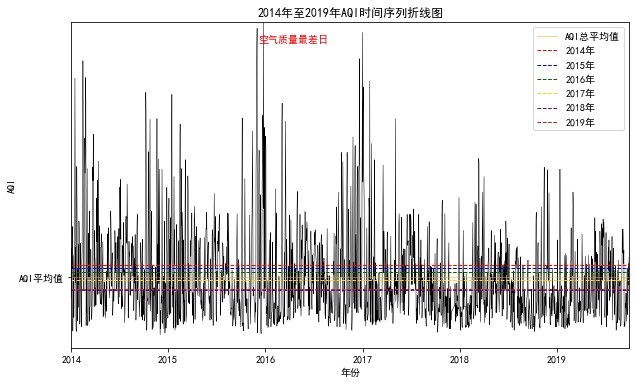

In [16]:
#查看AQI值走势及每年的平均值

plt.figure(figsize=(10,6))
plt.plot(data['AQI'],color='black',linestyle='-',linewidth=0.5)
plt.axhline(y=data['AQI'].mean(),color='orange', linestyle='-',linewidth=0.5,label='AQI总平均值')
data['年']=data['日期'].apply(lambda x:x.year) #提取年份
AQI_mean=data['AQI'].groupby(data['年']).mean().values
year=['2014年','2015年','2016年','2017年','2018年','2019年']
col=['red','blue','darkgreen','gold','purple','brown']
for i in range(6):
    plt.axhline(y=AQI_mean[i],color=col[i], linestyle='--',linewidth=1,label=year[i])
plt.title('2014年至2019年AQI时间序列折线图')
plt.xlabel('年份')
plt.ylabel('AQI')
plt.xlim(xmax=len(data), xmin=1)
plt.ylim(ymax=data['AQI'].max(),ymin=1)
plt.yticks([data['AQI'].mean()],['AQI平均值'])
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.legend(loc='best')
plt.text(x=list(data['AQI']).index(data['AQI'].max()), y=data['AQI'].max()-30, s='空气质量最差日', color='red');

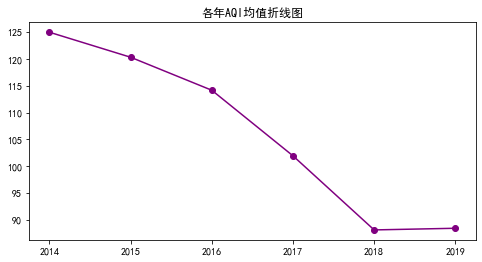

In [110]:
import warnings
warnings.filterwarnings(action = 'ignore')
plt.figure(figsize=(8,4))
plt.plot(AQI_mean, marker='o', markersize=6, color='purple', linestyle='-', linewidth=1.5)
plt.title('各年AQI均值折线图')
plt.xticks([0,1,2,3,4,5],['2014','2015','2016','2017','2018','2019']);

In [18]:
#查看AQI的频数分组

counts, bin_edges = np.histogram(data['AQI'], bins=20)
print(counts)

[252 449 370 272 214 194 122  74  31  31  28  15  15   9   7   3   3   3
   1   3]


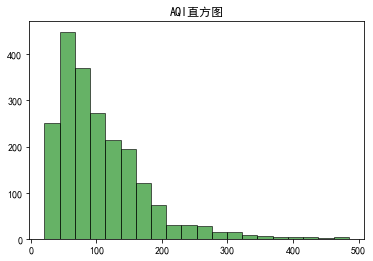

In [19]:
#AQI的直方图

plt.hist(data['AQI'], bins=20, density=False, alpha=0.6, color='green', edgecolor='black')
plt.title('AQI直方图');

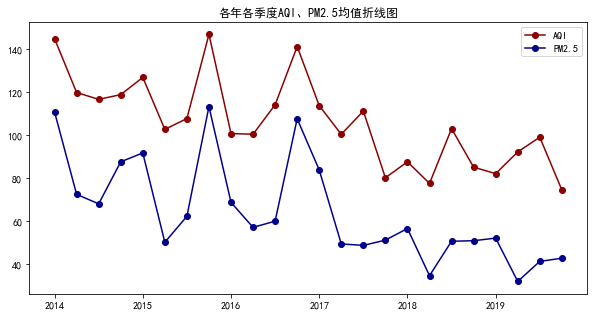

In [127]:
#各年各季度的AQI均值

import warnings
warnings.filterwarnings(action = 'ignore')
plt.figure(figsize=(10,5))
plt.plot(dat1.values, marker='o', markersize=6, color='darkred', linestyle='-', linewidth=1.5, label='AQI')
plt.plot(dat2.values, marker='o', markersize=6, color='darkblue', linestyle='-', linewidth=1.5, label='PM2.5')
plt.title('各年各季度AQI、PM2.5均值折线图')
plt.xticks([0,4,8,12,16,20],['2014','2015','2016','2017','2018','2019'])
plt.legend() ;

### 2.2 质量等级

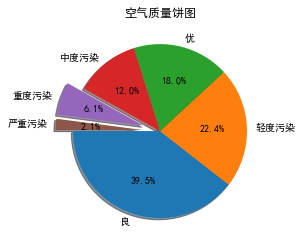

In [22]:
#查看空气质量等级的频数占比

tmp=pd.value_counts(data['质量等级'],sort=True)  
share=tmp/sum(tmp)
labels=tmp.index
explode = [0, 0, 0, 0, 0.2, 0.2] #explode (每一块)离开中心距离
plt.pie(share, explode = explode,labels = labels, autopct = '%3.1f%%',startangle = 180, shadow = True)
plt.title('空气质量饼图');

### 2.3 其余数值变量

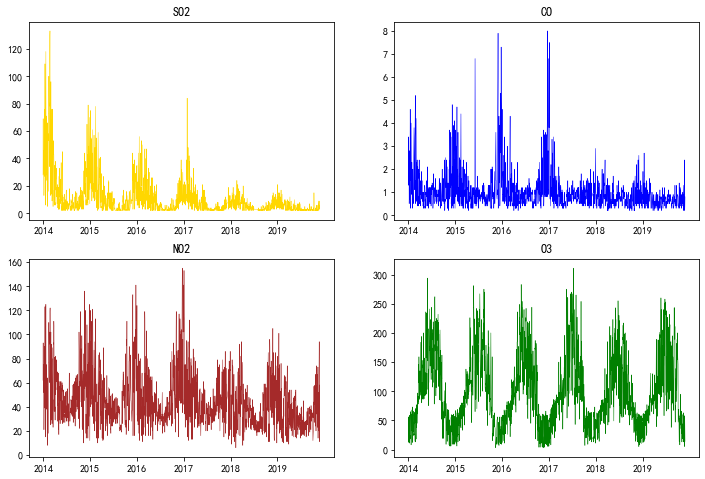

In [23]:
#查看其他变量的变化趋势

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(data['SO2'],color='gold',linestyle='-',linewidth=0.5)
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.title('SO2')

plt.subplot(2,2,2)
plt.plot(data['CO'],color='blue',linestyle='-',linewidth=0.5)
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.title('CO')

plt.subplot(2,2,3)
plt.plot(data['NO2'],color='brown',linestyle='-',linewidth=0.5)
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.title('NO2')

plt.subplot(2,2,4)
plt.plot(data['O3'],color='green',linestyle='-',linewidth=0.5)
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.title('O3');

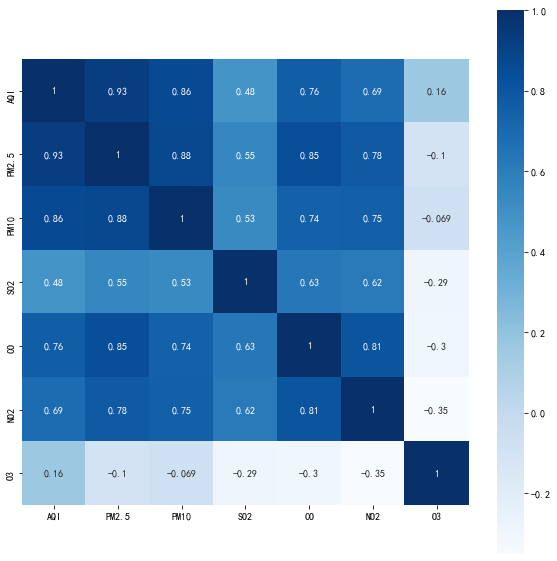

In [24]:
#计算相关系数矩阵

df5 = data.iloc[:,np.r_[1,3:9]]
cor = df5.corr()
plt.subplots(figsize=(10,10))
sb.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

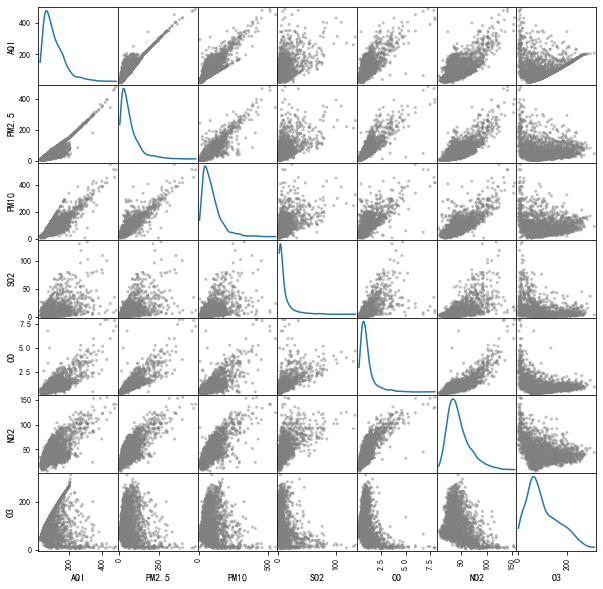

In [25]:
#散点图矩阵

pd.plotting.scatter_matrix(df5, alpha=0.5, figsize=(10,10), color='grey', diagonal='kde')
plt.show()

### 3、构建模型

### 3.1 回归模型
包括一元回归和多元回归

In [41]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors
from sklearn.metrics import classification_report

#### 3.1.1 一元回归

一元回归模型的截距项:2.365022
一元回归模型的回归系数: [59.84704207]


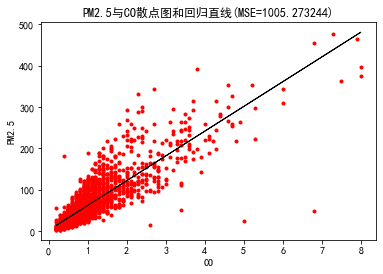

In [63]:
#一元回归

X=data[['CO']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR.intercept_)
print("一元回归模型的回归系数:",modelLR.coef_)
plt.scatter(data['CO'],data['PM2.5'],c='red',marker='.')
plt.title('PM2.5与CO散点图和回归直线(MSE=%f)'%(sum((y-modelLR.predict(X))**2)/len(y)))
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.plot(data['CO'],modelLR.predict(X),linewidth=1, color='black')
plt.show()

一元回归模型的截距项:-29.509603
一元回归模型的回归系数: [2.05994334]


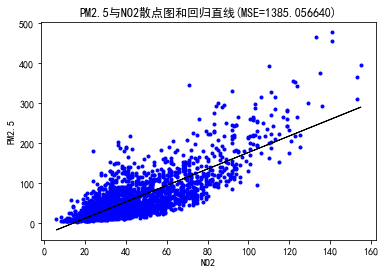

In [69]:
X=data[['NO2']]
y=data['PM2.5']
modelLR1=LM.LinearRegression()
modelLR1.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR1.intercept_)
print("一元回归模型的回归系数:",modelLR1.coef_)
plt.scatter(data['NO2'],data['PM2.5'],c='blue',marker='.')
plt.title('PM2.5与NO2散点图和回归直线(MSE=%f)'%(sum((y-modelLR1.predict(X))**2)/len(y)))
plt.xlabel('NO2')
plt.ylabel('PM2.5')
plt.plot(data['NO2'],modelLR1.predict(X),linewidth=1, color='black')
plt.show()

一元回归模型的截距项:39.578814
一元回归模型的回归系数: [2.38600601]


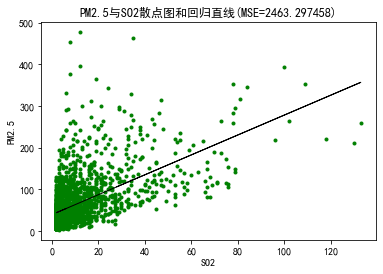

In [70]:
X=data[['SO2']]
y=data['PM2.5']
modelLR2=LM.LinearRegression()
modelLR2.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR2.intercept_)
print("一元回归模型的回归系数:",modelLR2.coef_)
plt.scatter(data['SO2'],data['PM2.5'],c='green',marker='.')
plt.title('PM2.5与SO2散点图和回归直线(MSE=%f)'%(sum((y-modelLR2.predict(X))**2)/len(y)))
plt.xlabel('SO2')
plt.ylabel('PM2.5')
plt.plot(data['SO2'],modelLR2.predict(X),linewidth=1, color='black')
plt.show()

一元回归模型的截距项:73.807643
一元回归模型的回归系数: [-0.09485372]


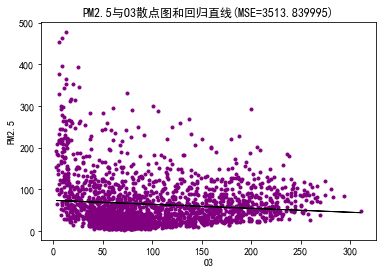

In [71]:
X=data[['O3']]
y=data['PM2.5']
modelLR3=LM.LinearRegression()
modelLR3.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR3.intercept_)
print("一元回归模型的回归系数:",modelLR3.coef_)
plt.scatter(data['O3'],data['PM2.5'],c='purple',marker='.')
plt.title('PM2.5与O3散点图和回归直线(MSE=%f)'%(sum((y-modelLR3.predict(X))**2)/len(y)))
plt.xlabel('O3')
plt.ylabel('PM2.5')
plt.plot(data['O3'],modelLR3.predict(X),linewidth=1, color='black')
plt.show()

#### 3.1.2 多元回归

In [72]:
#多元回归

X=data[['CO', 'NO2', 'SO2','O3']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("多元回归模型的截距项:%f"%modelLR.intercept_)
print("多元回归模型的回归系数:",modelLR.coef_)
print("多元回归模型的MSE:%f"%(sum((y-modelLR.predict(X))**2)/len(y)))

多元回归模型的截距项:-43.195106
多元回归模型的回归系数: [4.45148094e+01 9.04180327e-01 2.51578974e-02 2.00515660e-01]
多元回归模型的MSE:770.476031


###  3.2 分类问题
包括逻辑回归和KNN机器学习方法

#### 3.2.1 逻辑回归

In [33]:
#逻辑回归

data['有无污染']=data['质量等级'].map({'优':0,'良':0,'轻度污染':1,'中度污染':1,'重度污染':1,'严重污染':1})
print(data['有无污染'].value_counts())

0    1204
1     892
Name: 有无污染, dtype: int64


In [35]:
X=data[['PM2.5','PM10']]
y=data['有无污染']
modelLR=LM.LogisticRegression()
modelLR.fit(X,y)
print("截距项:%f"%modelLR.intercept_)
print("回归系数:",modelLR.coef_)
print("优势比{0}".format(np.exp(modelLR.coef_)))
yhat=modelLR.predict(X)
print("预测结果：",yhat)
print("正确率：%f"%(modelLR.score(X,y)))

截距项:-4.858429
回归系数: [[0.05260358 0.01852681]]
优势比[[1.05401173 1.0186995 ]]
预测结果： [0 1 0 ... 0 0 0]
正确率：0.846851


In [76]:
X=data[['PM2.5','PM10', 'CO', 'SO2', 'NO2', 'O3']]
y=data['有无污染']
modelLR=LM.LogisticRegression()
modelLR.fit(X,y)
print("截距项:%f"%modelLR.intercept_)
print("回归系数:",modelLR.coef_)
print("优势比{0}".format(np.exp(modelLR.coef_)))
yhat=modelLR.predict(X)
print("预测结果：",yhat)
print("正确率：%f"%(modelLR.score(X,y)))

截距项:-12.940023
回归系数: [[0.07419654 0.02764226 0.668826   0.02040551 0.00719501 0.04423915]]
优势比[[1.07701846 1.02802785 1.9519444  1.02061513 1.00722096 1.04523229]]
预测结果： [0 1 0 ... 0 0 0]
正确率：0.921756


训练误差: 0.0782442748091603
混淆矩阵:
 [[1128   76]
 [  88  804]]
F1-score: 0.90744920993228
AUC: 0.982303010890455
总正确率 0.9217557251908397


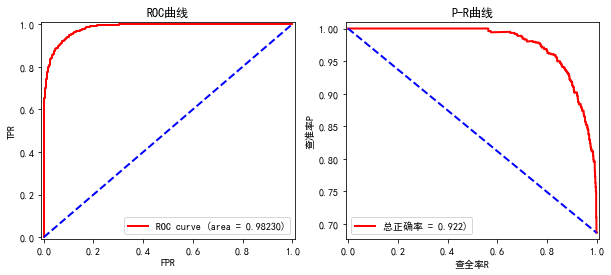

In [85]:
#计算混淆矩阵，ROC和PR曲线

X=data.loc[:,['PM2.5','PM10', 'CO', 'SO2', 'NO2', 'O3']]
Y=data.loc[:,'有无污染']
modelLR=LM.LogisticRegression()
modelLR.fit(X,Y)
print('训练误差:',1-modelLR.score(X,Y))  
print('混淆矩阵:\n',confusion_matrix(Y,modelLR.predict(X)))
print('F1-score:',f1_score(Y,modelLR.predict(X),pos_label=1))
fpr,tpr,thresholds = roc_curve(Y,modelLR.predict_proba(X)[:,1],pos_label=1) ###计算fpr和tpr
roc_auc = auc(fpr,tpr) ###计算auc的值
print('AUC:',roc_auc)
print('总正确率',accuracy_score(Y,modelLR.predict(X)))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axes[0].plot(fpr, tpr, color='r',linewidth=2, label='ROC curve (area = %0.5f)' % roc_auc) 
axes[0].plot([0, 1], [0, 1], color='blue', linewidth=2, linestyle='--')
axes[0].set_xlim([-0.01, 1.01])
axes[0].set_ylim([-0.01, 1.01])
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title('ROC曲线')
axes[0].legend(loc="lower right")

pre, rec, thresholds = precision_recall_curve(Y,modelLR.predict_proba(X)[:,1],pos_label=1)
axes[1].plot(rec, pre, color='r',linewidth=2, label='总正确率 = %0.3f)' % accuracy_score(Y,modelLR.predict(X))) 
axes[1].plot([0,1],[1,pre.min()],color='blue', linewidth=2, linestyle='--')
axes[1].set_xlim([-0.01, 1.01])
axes[1].set_ylim([pre.min()-0.01, 1.01])
axes[1].set_xlabel('查全率R')
axes[1].set_ylabel('查准率P')
axes[1].set_title('P-R曲线')
axes[1].legend(loc='lower left')
plt.show()

#### 3.2.2 KNN分类

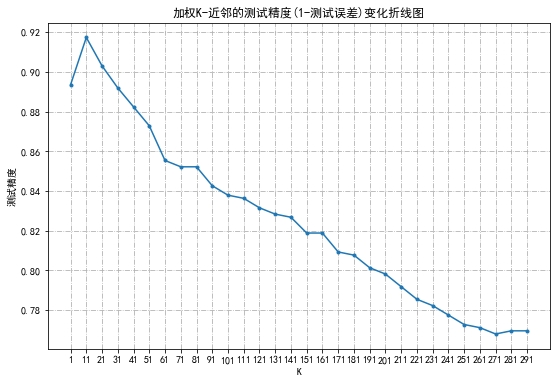

In [95]:
#KNN

X=data.loc[:,['PM2.5','PM10', 'CO', 'SO2', 'NO2', 'O3']]
Y=data.loc[:,'质量等级']
#划分测试集和训练集
testPre=[]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123) 
Ntrain=len(Y_train)
#设置K值
K=np.arange(1,int(Ntrain*0.20),10)
for k in K:
    modelKNN=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
    modelKNN.fit(X_train,Y_train)
    testPre.append(modelKNN.score(X_test,Y_test))    
#画图
plt.figure(figsize=(9,6))
plt.grid(True, linestyle='-.')
plt.xticks(K)
plt.plot(K,testPre,marker='.')
plt.xlabel("K")
plt.ylabel("测试精度")
bestK=K[testPre.index(np.max(testPre))]
plt.title("加权K-近邻的测试精度(1-测试误差)变化折线图");

In [88]:
modelKNN=neighbors.KNeighborsClassifier(n_neighbors=bestK,weights='distance')
modelKNN.fit(X_train,Y_train)
print('评价模型结果：\n',classification_report(Y,modelKNN.predict(X)))

评价模型结果：
               precision    recall  f1-score   support

        严重污染       0.98      0.98      0.98        43
        中度污染       0.95      0.95      0.95       252
           优       0.99      0.98      0.98       377
           良       0.98      0.99      0.98       827
        轻度污染       0.97      0.97      0.97       470
        重度污染       0.98      0.93      0.96       127

    accuracy                           0.98      2096
   macro avg       0.97      0.97      0.97      2096
weighted avg       0.98      0.98      0.98      2096

